In [1]:
# 📘 Student Performance Predictor for EduQuest Coaching

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create Dummy Dataset
np.random.seed(42)
n_students = 200
data = pd.DataFrame({
    'PreviousScore': np.random.randint(40, 100, n_students),
    'Attendance': np.random.randint(60, 100, n_students),
    'CourseEngagement': np.random.randint(1, 10, n_students),
    'HomeworkCompletion': np.random.randint(1, 10, n_students),
    'StudyHoursPerWeek': np.random.randint(1, 20, n_students),
    'ParentalSupport': np.random.choice(['Low', 'Medium', 'High'], n_students),
    'Gender': np.random.choice(['Male', 'Female'], n_students),
    'FinalResult': np.random.choice(['Pass', 'Fail'], n_students, p=[0.8, 0.2])
})
data.head()


,PreviousScore,Attendance,CourseEngagement,HomeworkCompletion,StudyHoursPerWeek,ParentalSupport,Gender,FinalResult
0,78,66,3,1,4,Low,Male,Pass
1,91,81,7,6,10,High,Male,Fail
2,68,87,2,5,3,Medium,Male,Pass
3,54,61,2,6,9,Low,Male,Pass
4,82,65,7,5,13,High,Female,Pass


In [2]:
# Step 3: Data Preprocessing
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('FinalResult_Pass', axis=1)
y = data_encoded['FinalResult_Pass']


In [3]:
# Step 4: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Step 6: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.08      0.14        12
        True       0.71      0.96      0.82        28

    accuracy                           0.70        40
   macro avg       0.61      0.52      0.48        40
weighted avg       0.65      0.70      0.62        40



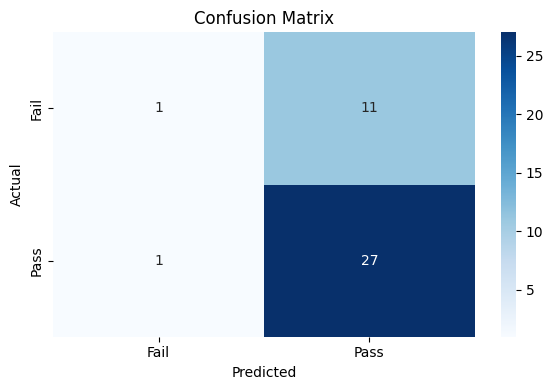

In [7]:
# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [10]:
# Step 9: Save the Dataset
data.to_csv("student_performance_data.csv", index=False)
print("Dataset saved as 'student_performance_data.csv'")


Dataset saved as 'student_performance_data.csv'
